This notebook runs with `openmc-15-0-env`. However, doesn't need openmc. Just the these python packages here and in the mtri_gmsh_helper.py. It needs `gmsh` and `python-gmsh` packages.

In [1]:
from mtri_gmsh_helpers import *
import numpy as np
import netCDF4 as nc

## Imported Data
These are read from the `geometry.nc` file generated by DEGAS2 (`definegeometry2d` tool).

In [2]:
#geometry_filename = "/users/hasanm4/lore.scorec.rpi.edu/wsources/readOH2csg/tests/assets/box_case/xgc_mesh/geometry.nc"
geometry_filename = "geometry.nc"

ds = nc.Dataset(geometry_filename)

# check if the `ncells` variable exists in the dataset and has value 46
assert 'ncells' in ds.variables, "Variable 'ncells' not found in dataset."
ncells_value = ds.variables['ncells'][:]
assert ncells_value == 46, f"Expected 'ncells' to be 46, but got {ncells_value}."

In [3]:
surface_coeffs = ds.variables['surface_coeffs'][:]
cells = ds.variables['cells'][:]
boundaries = ds.variables['boundaries'][:]
surface_points = ds.variables['surface_points'][:]
zone_centers = ds.variables['zone_center'][:]

ds.close()

surface_coeffs = np.array(surface_coeffs)
cells = np.array(cells)
boundaries = np.array(boundaries)
surface_points = np.array(surface_points)
zone_centers = np.array(zone_centers)

In [4]:
surface_check_id = 3
evaluate_dg2_quadric(surface_coeffs[surface_check_id], (1,0,1)), surface_coeffs[surface_check_id]

(np.float64(1.4), array([1. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ]))

## Plot Surfaces
---
Plot the quadratic surfaces projected onto the XZ plane for each cell.

In [5]:
mesh = load_triangulation('/users/hasanm4/lore.scorec.rpi.edu/wsources/readOH2csg/tests/assets/box_case/xgc_mesh/unique_triangulation.pkl')

Triangulation loaded from /users/hasanm4/lore.scorec.rpi.edu/wsources/readOH2csg/tests/assets/box_case/xgc_mesh/unique_triangulation.pkl


This is to identify the connectivity of the cells.

Cell 13 boundaries: [37 33 36 38] with signs [ 1 -1  1 -1]


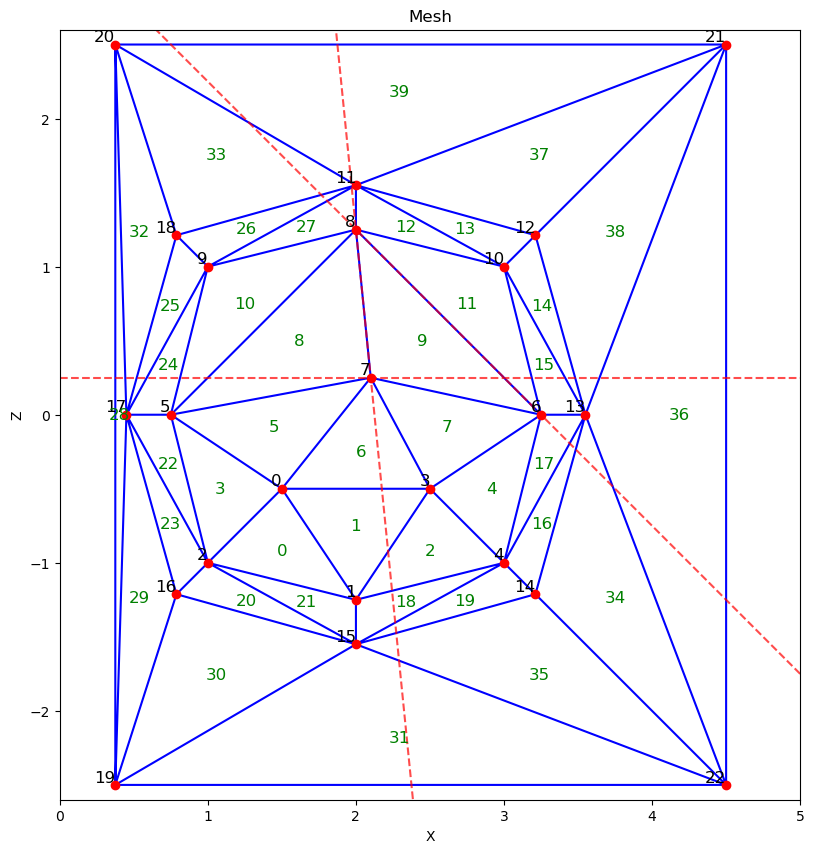

In [6]:
cell_id = 13
cell_boundary_ids, signs = get_cell_boundaries(cell_id, cells, boundaries)
print(f"Cell {cell_id} boundaries: {cell_boundary_ids} with signs {signs}")
fig, ax = plt.subplots()
plot_triangulation_with_labels(mesh, axis=ax)
for b_id in cell_boundary_ids:
    plot_quad_on_xz(surface_coeffs[b_id], (0,5), (-5,5), axis=ax)
    
#plot_quad_on_xz(surface_coeffs[12], (0,5), (-5,5))
ax.set_xlabel('X')
ax.set_ylabel('Z')
# equal axis scaling
ax.set_aspect('equal')
ax.set_xlim(0,5)
ax.set_ylim(-2.6,  2.6)
fig.set_size_inches(10, 10)
plt.show()

We found that there are cells that are subdivides of some triangles which counts for the mismatch in the number of cells (46) vs number of triangles (40) + one univeral cell (1) = 41.